***Master's in Health Data Science (MHEDAS)***

***Medical Imaging***

Professor: Roser Sala Llonch

Year 2025-2026


---



# P3. Functional MRI

In sthis practical session, we will see different types of functional MRI data and how to analyse them

In [1]:
# Install nilearn
try:
    import nilearn
except ImportError:
    # if not, install it using pip
    !pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 18.2 MB/s eta 0:00:00


##1. The Haxby dataset
A study of visual object category identification. It has been widely used in cognitive neuroscience and for brain decoding.
The original paper can be found [HERE](https://www.science.org/doi/10.1126/science.1063736)



###1.1. Show stimuli
Visualize the set of stimuli used in the task. This is not related to the fMRI data, but it's a good visualization practice.

[fetch_haxby] Added README.md to /root/nilearn_data

[fetch_haxby] Dataset created in /root/nilearn_data/haxby2001

[fetch_haxby] Downloading data from https://www.nitrc.org/frs/download.php/7868/mask.nii.gz ...

[fetch_haxby]  ...done. (0 seconds, 0 min)

[fetch_haxby] Downloading data from http://data.pymvpa.org/datasets/haxby2001/MD5SUMS ...

[fetch_haxby]  ...done. (0 seconds, 0 min)

[fetch_haxby] Downloading data from http://data.pymvpa.org/datasets/haxby2001/stimuli-2010.01.14.tar.gz ...

[fetch_haxby] Downloaded 5914624 of 10463676 bytes (56.5%%,    0.8s remaining)

[fetch_haxby]  ...done. (2 seconds, 0 min)

[fetch_haxby] Extracting data from 
/root/nilearn_data/haxby2001/ee9e0d5a40146477e9197f0d13da9b32/stimuli-2010.01.14.tar.gz...

[fetch_haxby] .. done.

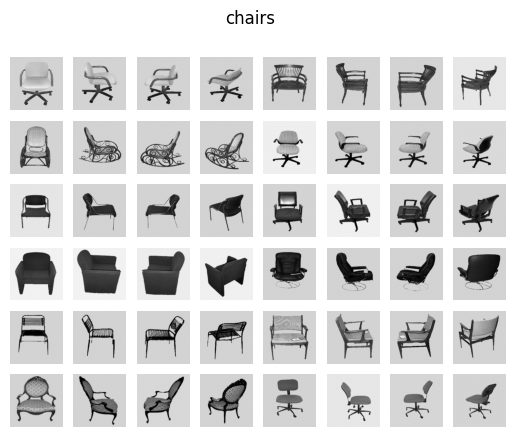

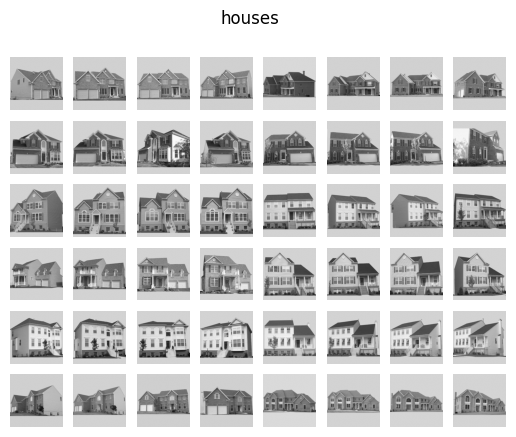

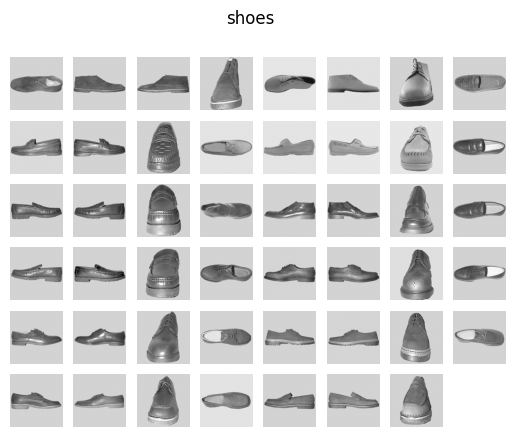

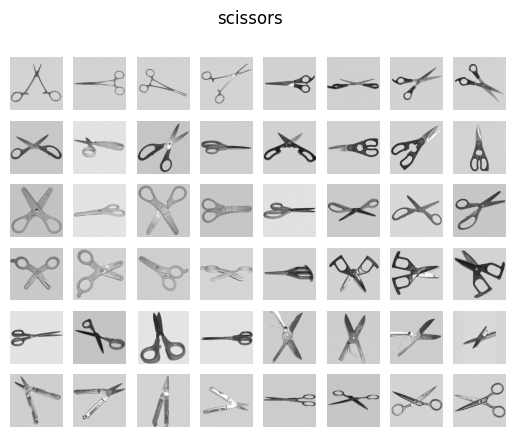

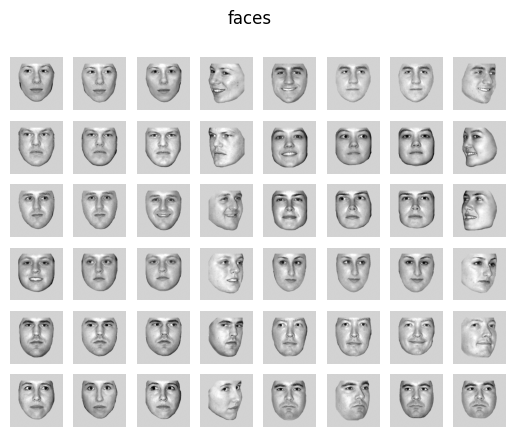

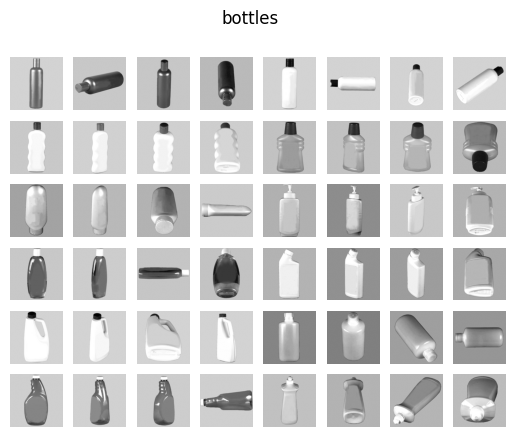

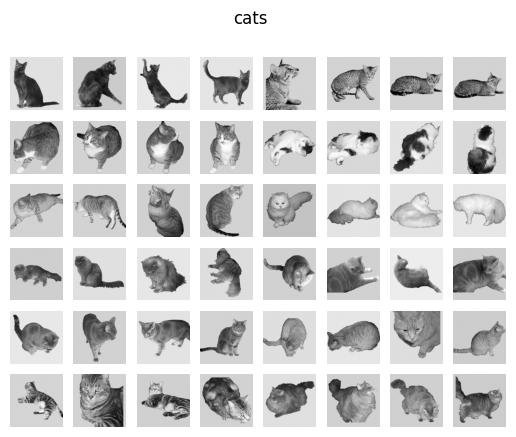

In [2]:
import matplotlib.pyplot as plt

from nilearn import datasets
from nilearn.plotting import show

haxby_dataset = datasets.fetch_haxby(subjects=[], fetch_stimuli=True)
stimulus_information = haxby_dataset.stimuli

for stim_type in stimulus_information:
    # skip control images, there are too many
    if stim_type != 'controls':

        file_names = stimulus_information[stim_type]

        fig, axes = plt.subplots(6, 8)
        fig.suptitle(stim_type)

        for img_path, ax in zip(file_names, axes.ravel()):
            ax.imshow(plt.imread(img_path), cmap=plt.cm.gray)

        for ax in axes.ravel():
            ax.axis("off")

show()

**Exercise 1.1.** Take a look at the paper and explain with your words how are these images used in the context of fMRI

### *PLACE YOUR ANSWER HERE*



###1.2. Fetch the dataset


Dowload the dataset from nilearn:

In [3]:
import numpy as np # always good to have numpy and pandas in your environment
import pandas as pd
from nilearn import datasets

# fetch the data (by default, 2nd subject will be fetched, check the documentation if you want to change the subject)
haxby_dataset = datasets.fetch_haxby()

[fetch_haxby] Dataset found in /root/nilearn_data/haxby2001

[fetch_haxby] Downloading data from http://data.pymvpa.org/datasets/haxby2001/subj2-2010.01.14.tar.gz ...

[fetch_haxby] Downloaded 7733248 of 291168628 bytes (2.7%%,   36.7s remaining)

[fetch_haxby] Downloaded 33464320 of 291168628 bytes (11.5%%,   19.9s remaining)

[fetch_haxby] Downloaded 60252160 of 291168628 bytes (20.7%%,   13.8s remaining)

[fetch_haxby] Downloaded 84123648 of 291168628 bytes (28.9%%,   11.4s remaining)

[fetch_haxby] Downloaded 89169920 of 291168628 bytes (30.6%%,   13.0s remaining)

[fetch_haxby] Downloaded 117702656 of 291168628 bytes (40.4%%,   11.2s remaining)

[fetch_haxby] Downloaded 134578176 of 291168628 bytes (46.2%%,   10.2s remaining)

[fetch_haxby] Downloaded 153403392 of 291168628 bytes (52.7%%,    8.8s remaining)

[fetch_haxby] Downloaded 181764096 of 291168628 bytes (62.4%%,    6.5s remaining)

[fetch_haxby] Downloaded 202760192 of 291168628 bytes (69.6%%,    5.3s remaining)

[fetch_haxby] Downloaded 228704256 of 291168628 bytes (78.5%%,    3.6s remaining)

[fetch_haxby] Downloaded 245735424 of 291168628 bytes (84.4%%,    2.7s remaining)

[fetch_haxby] Downloaded 268754944 of 291168628 bytes (92.3%%,    1.3s remaining)

[fetch_haxby]  ...done. (17 seconds, 0 min)

[fetch_haxby] Extracting data from 
/root/nilearn_data/haxby2001/9cabe068089e791ef0c5fe930fc20e30/subj2-2010.01.14.tar.gz...

[fetch_haxby] .. done.

**Exercise 1.2.1** Examine the data that you've just downloaded. Try to identify the different elements in the dataset (don't worry, just make a guess)

In [4]:
# First I want to know with what data type are we working
print(type(haxby_dataset))
# Is like DICT + ATTRIBUTES

"""
Brain imaging data:

anat: Anatomical brain scan (structural MRI)
func: Functional MRI data (BOLD signal - blood oxygen level dependent)
mask: Various brain masks to isolate specific regions of interest

Experiment data:

session_target: Labels indicating what stimulus was shown (faces, houses, etc.)

Region-specific masks:

mask_vt: Ventral visual/temporal cortex mask
mask_face / mask_face_little: Regions that respond to faces
mask_house / mask_house_little: Regions that respond to houses

The Study:
This was a classic neuroscience study that showed participants images of different categories (faces, houses, and other objects) while scanning their brains. The key finding was that face and object processing showed widely distributed and overlapping patterns in the ventral visual stream, rather than being completely segregated.

"""

<class 'sklearn.utils._bunch.Bunch'>


'\nBrain imaging data:\n\nanat: Anatomical brain scan (structural MRI)\nfunc: Functional MRI data (BOLD signal - blood oxygen level dependent)\nmask: Various brain masks to isolate specific regions of interest\n\nExperiment data:\n\nsession_target: Labels indicating what stimulus was shown (faces, houses, etc.)\n\nRegion-specific masks:\n\nmask_vt: Ventral visual/temporal cortex mask\nmask_face / mask_face_little: Regions that respond to faces\nmask_house / mask_house_little: Regions that respond to houses\n\nThe Study:\nThis was a classic neuroscience study that showed participants images of different categories (faces, houses, and other objects) while scanning their brains. The key finding was that face and object processing showed widely distributed and overlapping patterns in the ventral visual stream, rather than being completely segregated.\n\n'

In [5]:
print(haxby_dataset.keys())
for key, value in haxby_dataset.items():
    print(f"{key}: {value}")

dict_keys(['anat', 'func', 'session_target', 'mask_vt', 'mask_face', 'mask_house', 'mask_face_little', 'mask_house_little', 'mask', 'description'])
anat: ['/root/nilearn_data/haxby2001/subj2/anat.nii.gz']
func: ['/root/nilearn_data/haxby2001/subj2/bold.nii.gz']
session_target: ['/root/nilearn_data/haxby2001/subj2/labels.txt']
mask_vt: ['/root/nilearn_data/haxby2001/subj2/mask4_vt.nii.gz']
mask_face: ['/root/nilearn_data/haxby2001/subj2/mask8b_face_vt.nii.gz']
mask_house: ['/root/nilearn_data/haxby2001/subj2/mask8b_house_vt.nii.gz']
mask_face_little: ['/root/nilearn_data/haxby2001/subj2/mask8_face_vt.nii.gz']
mask_house_little: ['/root/nilearn_data/haxby2001/subj2/mask8_house_vt.nii.gz']
mask: /root/nilearn_data/haxby2001/mask.nii.gz
description: .. _haxby_dataset:

Haxby dataset

Access
------
See :func:`nilearn.datasets.fetch_haxby`.

Notes
-----
Results from a classical :term:`fMRI` study that investigated the differences between
the neural correlates of face versus object processing

# ANSWER 1
As we see above, we have the complete or extended dataset from the article:

*   anat -> anatomical image
*   mask_vt -> mask of the "ventral temporal cortex"
*   mask_face -> region that responds to faces
*   mask_house-> region that responds to houses
*    mask_face_little-> smaller and precise version
*    mask_house_little idem for homes






In [6]:
import pandas as pd
#Lets see for the stimulus classification array (an exemple)
labels = pd.read_csv(haxby_dataset.session_target[0], sep=" ")
print(labels[:20])


      labels  chunks
0       rest       0
1       rest       0
2       rest       0
3       rest       0
4       rest       0
5       rest       0
6   scissors       0
7   scissors       0
8   scissors       0
9   scissors       0
10  scissors       0
11  scissors       0
12  scissors       0
13  scissors       0
14  scissors       0
15      rest       0
16      rest       0
17      rest       0
18      rest       0
19      rest       0


Get the behavioral data (information about how the subject performed the task):

In [7]:
# Load target information as string and give a numerical identifier to each
behavioral = pd.read_csv(haxby_dataset.session_target[0], sep=' ')
conditions = behavioral['labels'].values


# Record these as an array of sessions
sessions = behavioral['chunks'].values
unique_sessions = behavioral['chunks'].unique()

# fMRI data: a unique file for each session
func_filename = haxby_dataset.func[0]

# **Exercise 1.2.2** Examine what you've loaded.

In [8]:
print(behavioral.head())


  labels  chunks
0   rest       0
1   rest       0
2   rest       0
3   rest       0
4   rest       0


In [9]:
print("Conditions shape:", conditions.shape)
print("Sessions shape:", sessions.shape)


Conditions shape: (1452,)
Sessions shape: (1452,)


In [10]:
# So we have a DF, then we want to known how is the classification, that is, how many labels of data we will have
print("Unique labels:", behavioral['labels'].unique())


Unique labels: ['rest' 'scissors' 'face' 'cat' 'shoe' 'house' 'scrambledpix' 'bottle'
 'chair']


In [11]:
print("Unique sessions:", unique_sessions)
# The identifiers for the sessions, we have 12 differents sessions (exposition at one subject to a set of images)
# As the study sais that there were 6 participants -> 2 sessions/px.

Unique sessions: [ 0  1  2  3  4  5  6  7  8  9 10 11]


From the session data, we'll create an *event structure* for each session.

In [12]:
TR = 2.5 # we need to indicate the Time of Repetition (TR) manually
events = {}
# events will take  the form of a dictionary of Dataframes, one per session
for session in unique_sessions:
    # get the condition label per session
    conditions_session = conditions[sessions == session]
    # get the number of scans per session, then the corresponding
    # vector of frame times
    n_scans = len(conditions_session)
    frame_times = TR * np.arange(n_scans)
    # each event last the full TR
    duration = TR * np.ones(n_scans)
    # Define the events object
    events_ = pd.DataFrame(
        {'onset': frame_times, 'trial_type': conditions_session, 'duration': duration})
    # remove the rest condition and insert into the dictionary
    events[session] = events_[events_.trial_type != 'rest']

# **Exercise 1.2.3** Take a look at the new DataFrame. The events can be visualized using the 'plot_event' function.



In [13]:
events

{np.int64(0):      onset trial_type  duration
 6     15.0   scissors       2.5
 7     17.5   scissors       2.5
 8     20.0   scissors       2.5
 9     22.5   scissors       2.5
 10    25.0   scissors       2.5
 ..     ...        ...       ...
 110  275.0      chair       2.5
 111  277.5      chair       2.5
 112  280.0      chair       2.5
 113  282.5      chair       2.5
 114  285.0      chair       2.5
 
 [72 rows x 3 columns],
 np.int64(1):      onset trial_type  duration
 6     15.0       face       2.5
 7     17.5       face       2.5
 8     20.0       face       2.5
 9     22.5       face       2.5
 10    25.0       face       2.5
 ..     ...        ...       ...
 110  275.0      house       2.5
 111  277.5      house       2.5
 112  280.0      house       2.5
 113  282.5      house       2.5
 114  285.0      house       2.5
 
 [72 rows x 3 columns],
 np.int64(2):      onset trial_type  duration
 6     15.0       face       2.5
 7     17.5       face       2.5
 8     20.0       

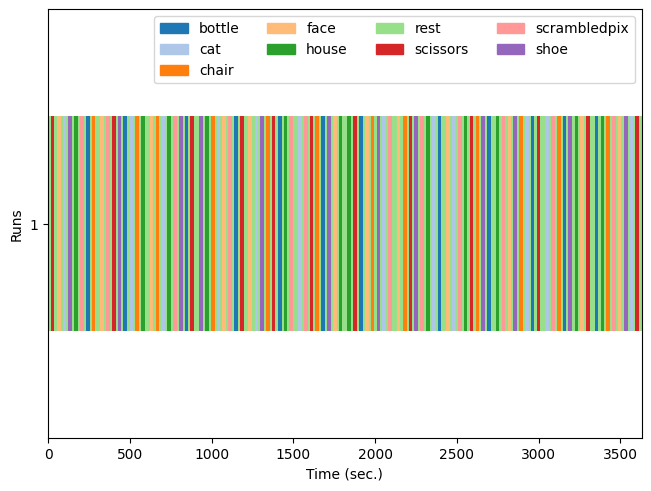

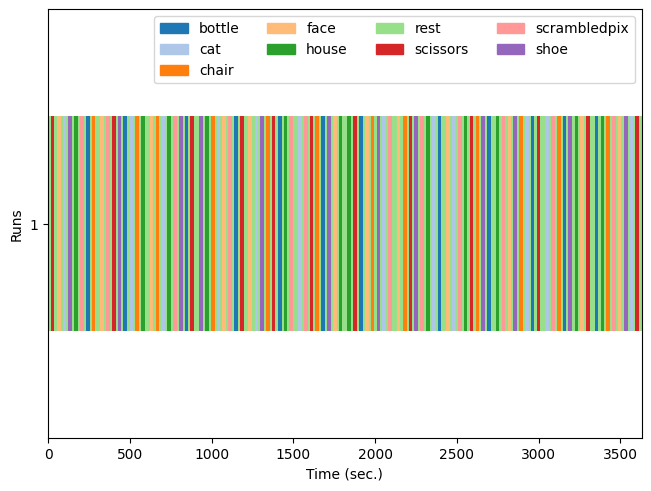

In [14]:
from nilearn.plotting import plot_event

events = pd.DataFrame({
    'onset': behavioral.index * TR,          # Repetition Ttime in seconds
    'duration': TR,                          # timelapse of each timepoint for each volume  de cada volumen
    'trial_type': behavioral['labels']
})
plot_event(events)
print(len(events)) # test


### 1.3. Define the GLM model and run the analyses.

We'll use tools from nilearn to generate the statistical model.

REMEMBER: A first level model is the statistical comparison between the different *conditions* (or blocks) from a *single subject*.

You can find more information [HERE](https://nilearn.github.io/stable/glm/index.html)

In [15]:
z_maps = []
conditions_label = []
session_label = []

# Instantiate the glm
from nilearn.glm.first_level import FirstLevelModel
glm = FirstLevelModel(t_r=TR,
                      mask_img=haxby_dataset.mask,
                      high_pass=.008,
                      smoothing_fwhm=4,
                      memory='nilearn_cache')



In [16]:
# We have to redefine events
events = {}
# events will take  the form of a dictionary of Dataframes, one per session
for session in unique_sessions:
    # get the condition label per session
    conditions_session = conditions[sessions == session]
    # get the number of scans per session, then the corresponding
    # vector of frame times
    n_scans = len(conditions_session)
    frame_times = TR * np.arange(n_scans)
    # each event last the full TR
    duration = TR * np.ones(n_scans)
    # Define the events object
    events_ = pd.DataFrame(
        {'onset': frame_times, 'trial_type': conditions_session, 'duration': duration})
    # remove the rest condition and insert into the dictionary
    events[session] = events_[events_.trial_type != 'rest']

Before running the GLM massively, let's try to understand it with one example:




In [17]:
events[session].trial_type.unique()
from nilearn.image import index_img
fmri_session = index_img(func_filename, sessions ==0)
glm.fit(fmri_session, events = events[0])

FirstLevelModel(high_pass=0.008,
                mask_img='/root/nilearn_data/haxby2001/mask.nii.gz',
                memory='nilearn_cache', smoothing_fwhm=4, t_r=2.5)

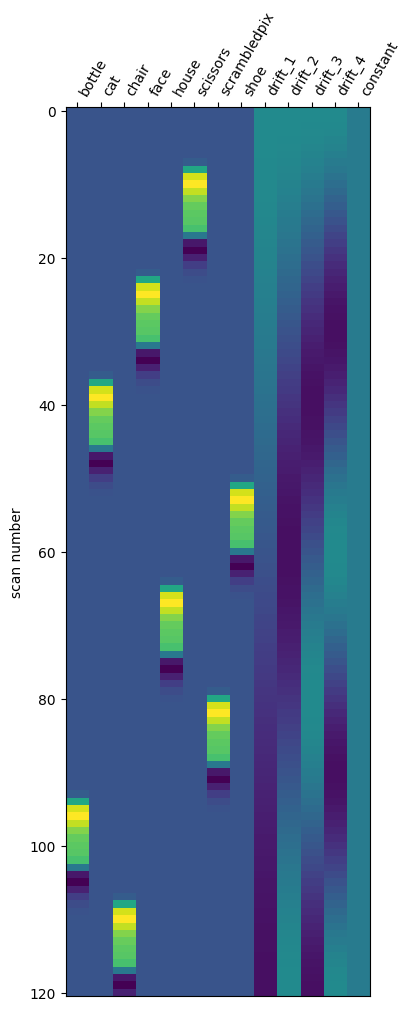

In [18]:
from nilearn.plotting import plot_design_matrix
design_matrix = glm.design_matrices_[0]
plot_design_matrix(design_matrix)
plt.show()

**Now**, run the GLM on **each** session from the *events* dataframe.  

In [19]:
# now run the GLM on each session
events[session].trial_type.unique()
from nilearn.image import index_img
for session in unique_sessions:
    # grab the fmri data for that particular session
    fmri_session = index_img(func_filename, sessions == session)

    # fit the glm
    glm.fit(fmri_session, events=events[session])

    # set up contrasts: one per condition
    conditions = events[session].trial_type.unique()
    for condition_ in conditions:
        z_maps.append(glm.compute_contrast(condition_))
        conditions_label.append(condition_)
        session_label.append(session)

#**Exercise 1.3.1**: Explain what do you interpret from the figure. You can plot other sessions to see the differences.

The vertical axis (scan number) reflects time during the fMRI acquisition.

The horizontal axis lists the experimental conditions or regressors used in the GLM design matrix.

Bright vertical bands indicate when a specific condition was presented during the session.

Columns labeled drift_1, drift_2, drift_3, and constant represent non-task-related point.

So:

Each column corresponds to a specific experimental condition, and the color intensity within that column (from dark blue to bright yellow) represents the level of activation of that predictor at each scan number. Brighter yellow values indicate moments when the stimulus associated with that condition was presented and therefore when its regressor is active.

This allows us to visualize the temporal structure of each session: we can clearly see the sequence in which the different stimuli were shown and how the design matrix captures their timing. Across sessions, the overall pattern is consistent, reflecting the repeated structure of the experimental paradigm, although small variations may appear due to session‑specific differences.

/tmp/ipython-input-5545098.py:26: DeprecationWarning: The parameter "ax" will be removed in 0.13.0 release of Nilearn. Please use the parameter "axes" instead.
  plot_design_matrix(design_matrix, ax=ax)
/tmp/ipython-input-5545098.py:26: DeprecationWarning: The parameter "ax" will be removed in 0.13.0 release of Nilearn. Please use the parameter "axes" instead.
  plot_design_matrix(design_matrix, ax=ax)
/tmp/ipython-input-5545098.py:26: DeprecationWarning: The parameter "ax" will be removed in 0.13.0 release of Nilearn. Please use the parameter "axes" instead.
  plot_design_matrix(design_matrix, ax=ax)
/tmp/ipython-input-5545098.py:26: DeprecationWarning: The parameter "ax" will be removed in 0.13.0 release of Nilearn. Please use the parameter "axes" instead.
  plot_design_matrix(design_matrix, ax=ax)
/tmp/ipython-input-5545098.py:26: DeprecationWarning: The parameter "ax" will be removed in 0.13.0 release of Nilearn. Please use the parameter "axes" instead.
  plot_design_matrix(design_

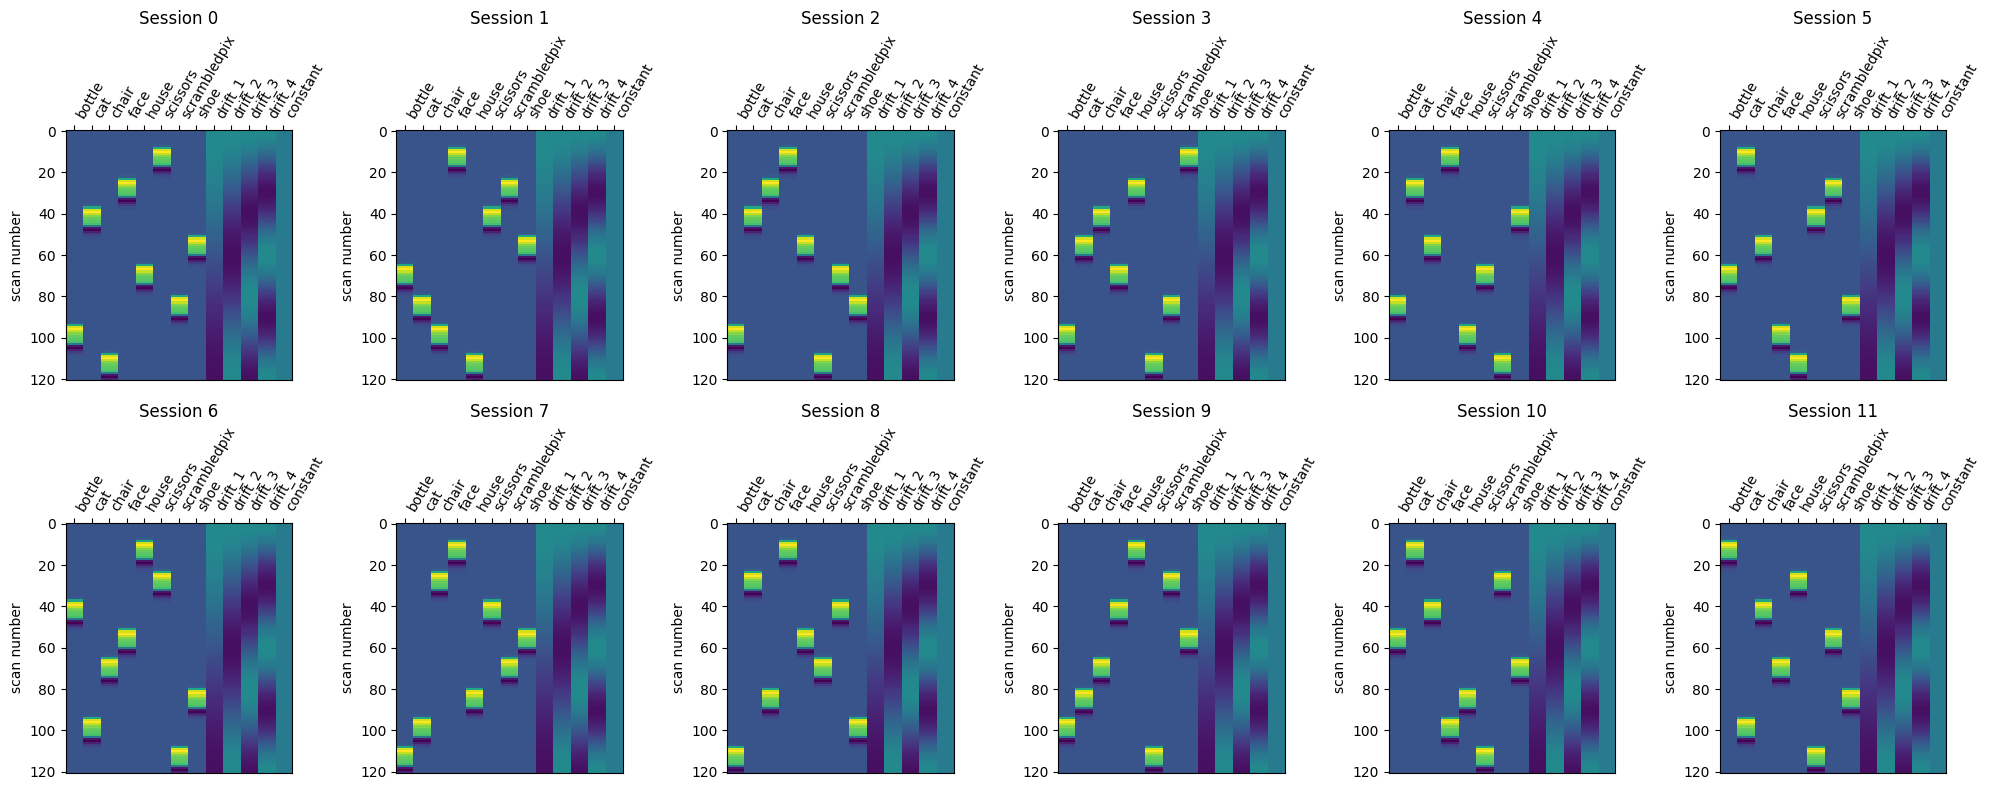

In [20]:
from nilearn.image import index_img
from nilearn.plotting import plot_design_matrix
import matplotlib.pyplot as plt
import math

n_sessions = len(unique_sessions)

# 2 rows to visualize better the differences, we have 12 sessions
fig, axes = plt.subplots(2, math.ceil(n_sessions / 2), figsize=(20, 8))

axes = axes.flatten()

for i, session in enumerate(unique_sessions):
    ax = axes[i]

    # We get the fMRI data from the session
    fmri_session = index_img(func_filename, sessions == session)

    # Adjust the GLM
    glm.fit(fmri_session, events=events[session])

    # Design matrix computatiopn
    design_matrix = glm.design_matrices_[0]

    # fill the subplot
    plot_design_matrix(design_matrix, ax=ax)
    ax.set_title(f"Session {session}")

# If there's some empty session, we hide it
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


###1.4. Understanding the **contrasts** and generate a report of the results.

We'll use a specific function that generates a summary report of the results of the First Level analysis.

/tmp/ipython-input-3680939982.py:3: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  mean_img_ = mean_img(func_filename)
/tmp/ipython-input-3680939982.py:4: UserWarning: 'threshold=3.09' will not be used with 'height_control='fpr''. 'threshold' is only used when 'height_control=None'. Set 'threshold' to '3.0' to avoid this warning.
  report = make_glm_report(glm,
/tmp/ipython-input-3680939982.py:4: UserWarning: 'threshold=3.09' will not be used with 'height_control='fpr''. 'threshold' is only used when 'height_control=None'. Set 'threshold' to '3.0' to avoid this warning.
  report = make_glm_report(glm,
/tmp/ipython-input-3680939982.py:4: UserWarning: 'threshold=3.09' will not be used with 'height_control='fpr''. 'threshold' is only used when 'height_control=None'. Set 'thres


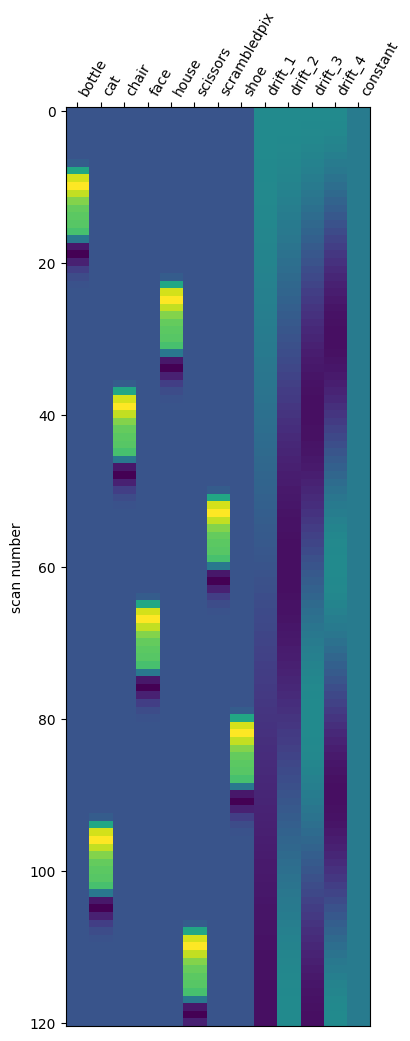
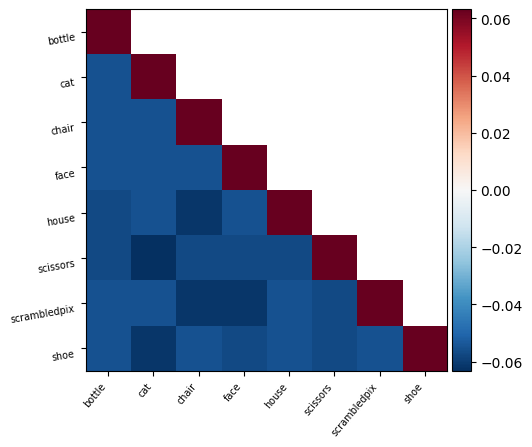
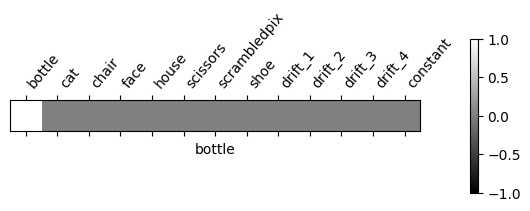
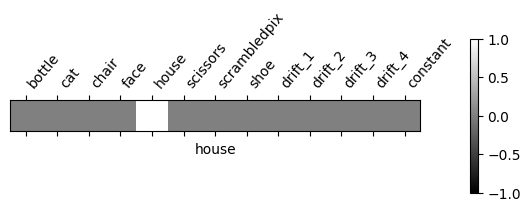
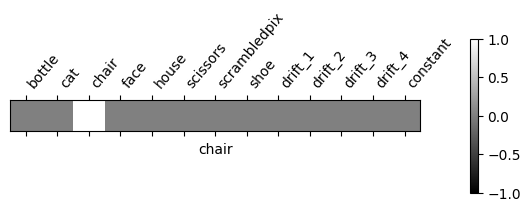
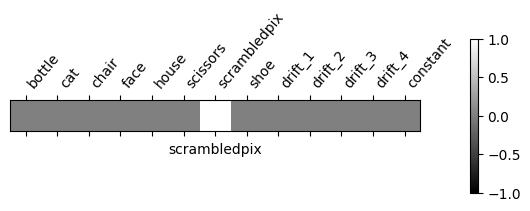
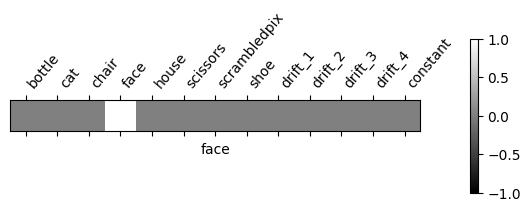
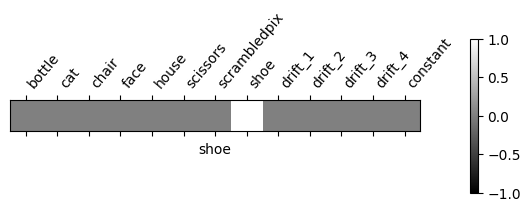
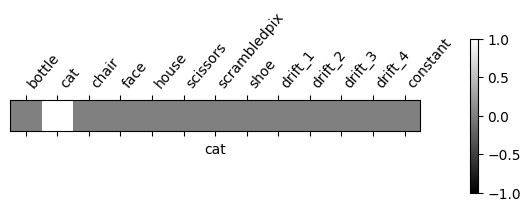
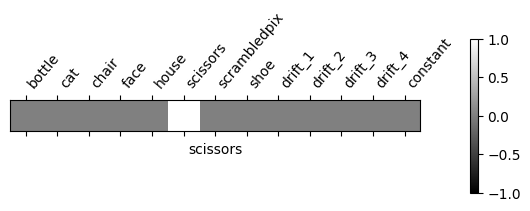
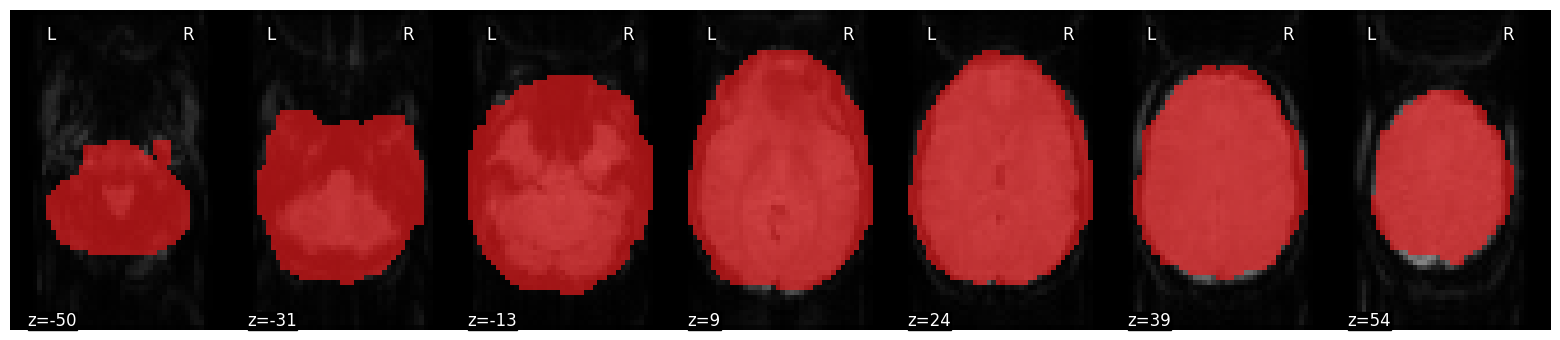
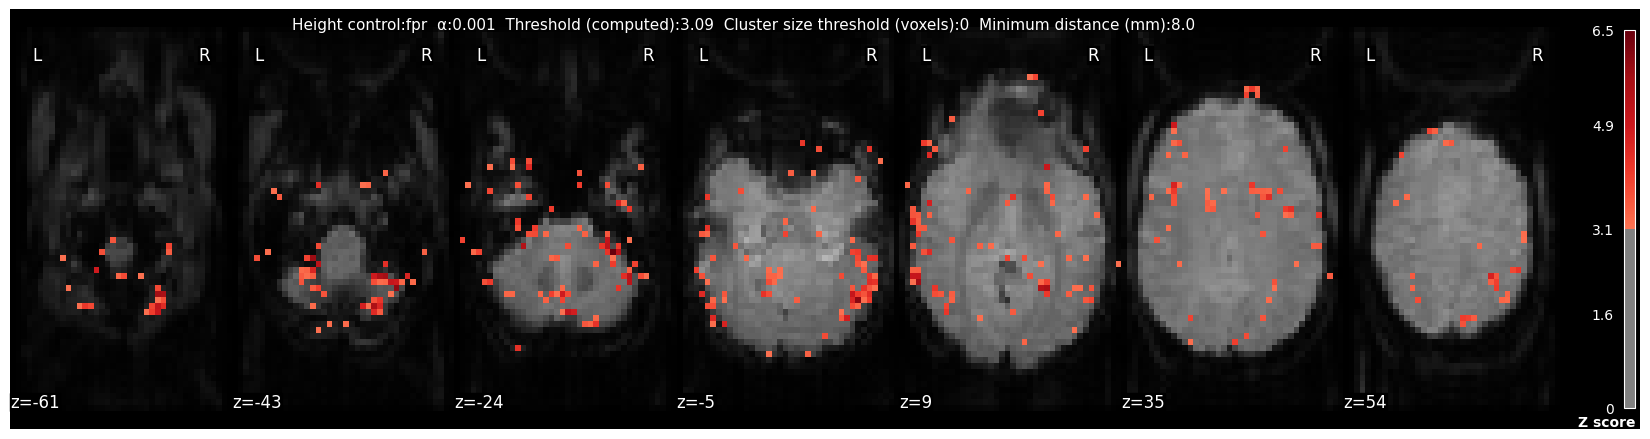
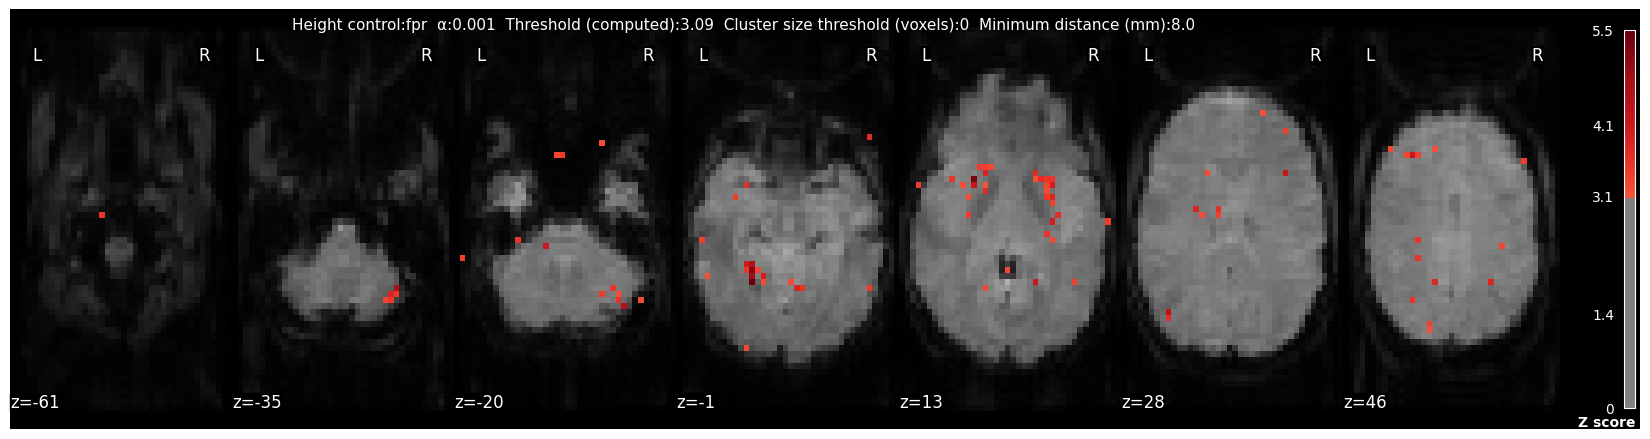
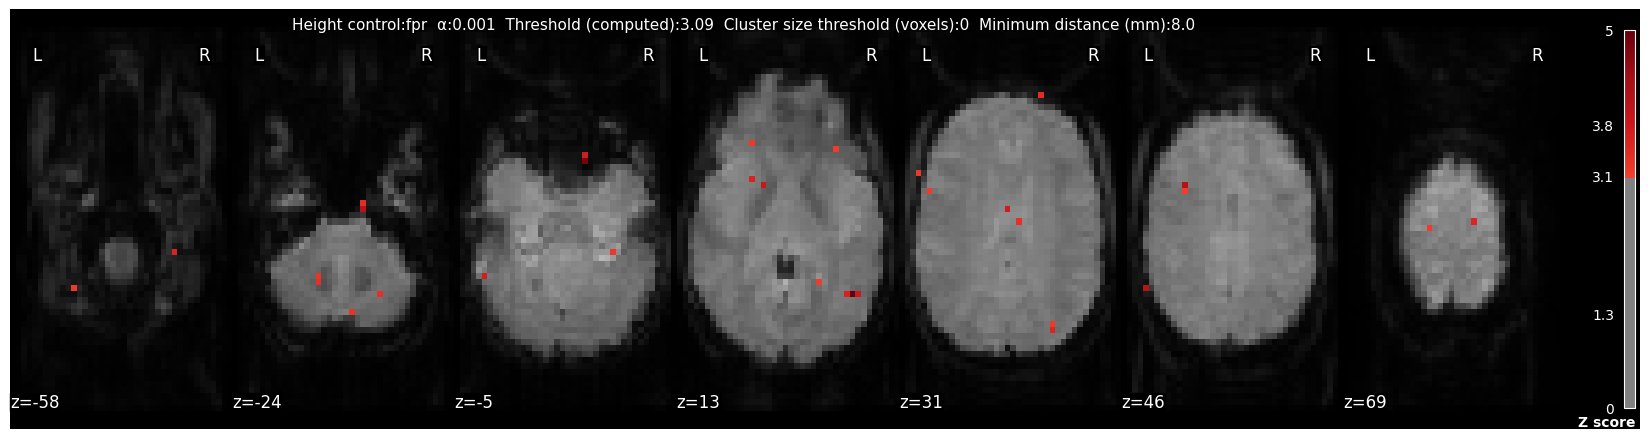
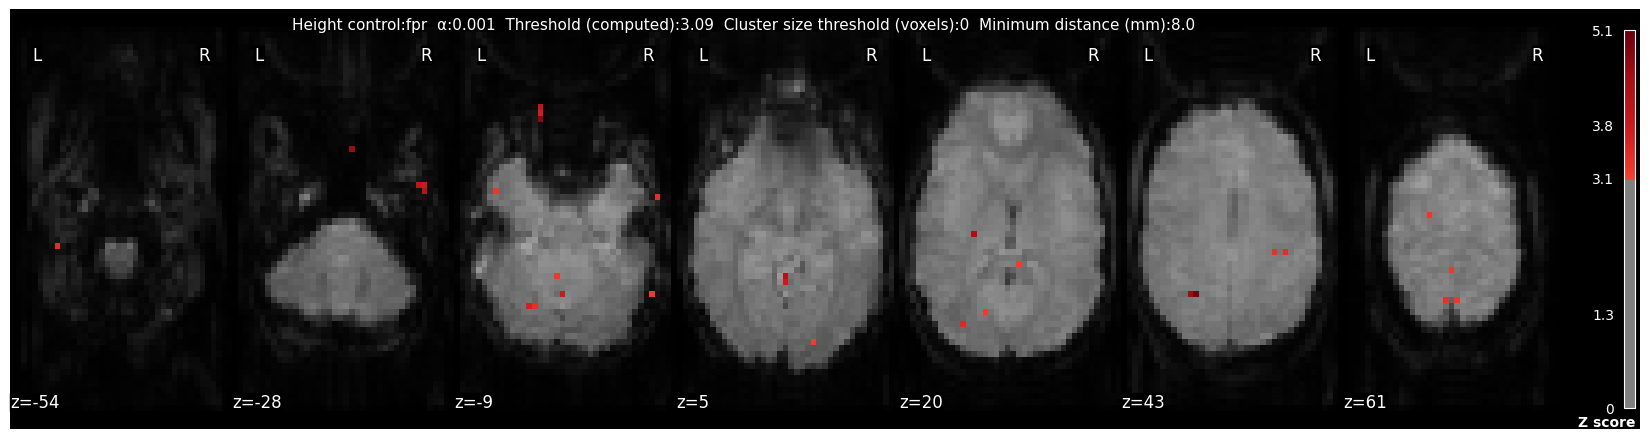
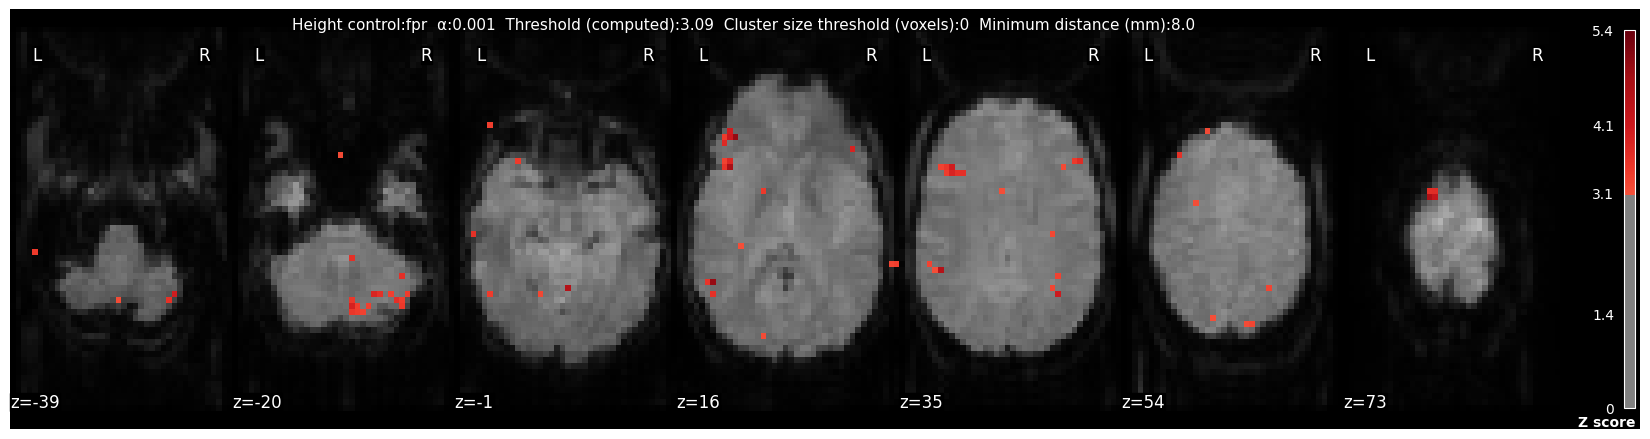
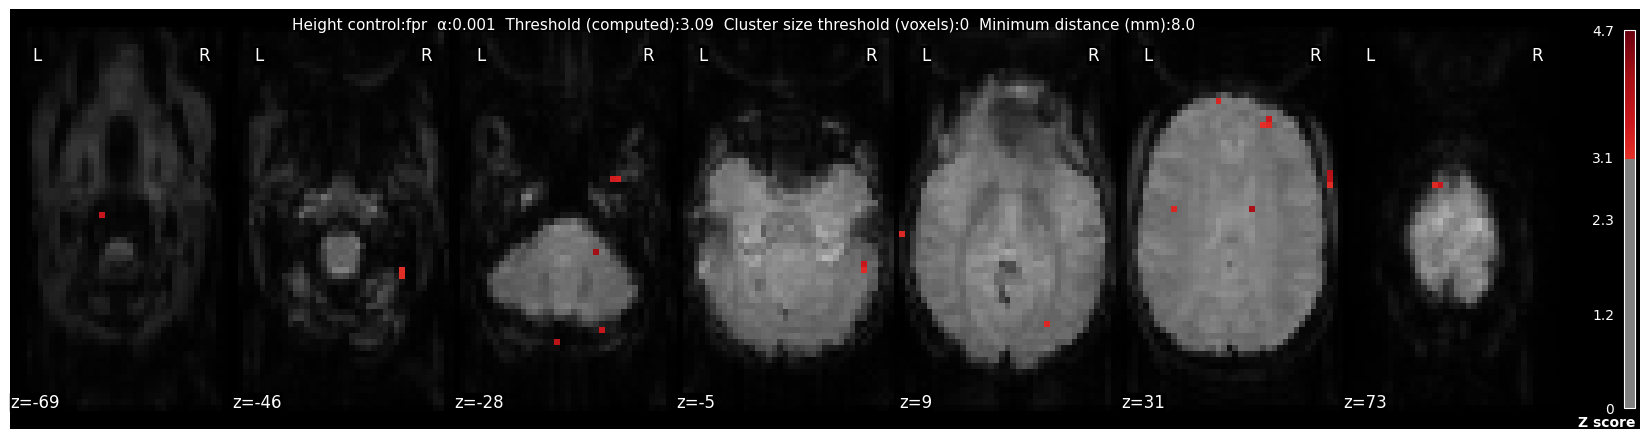
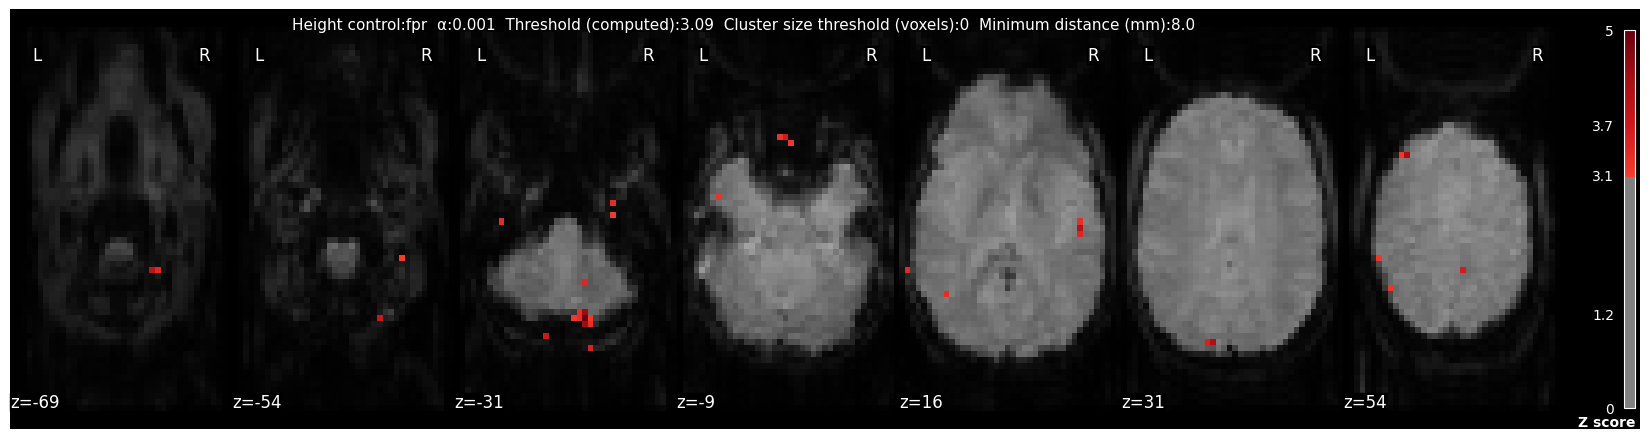
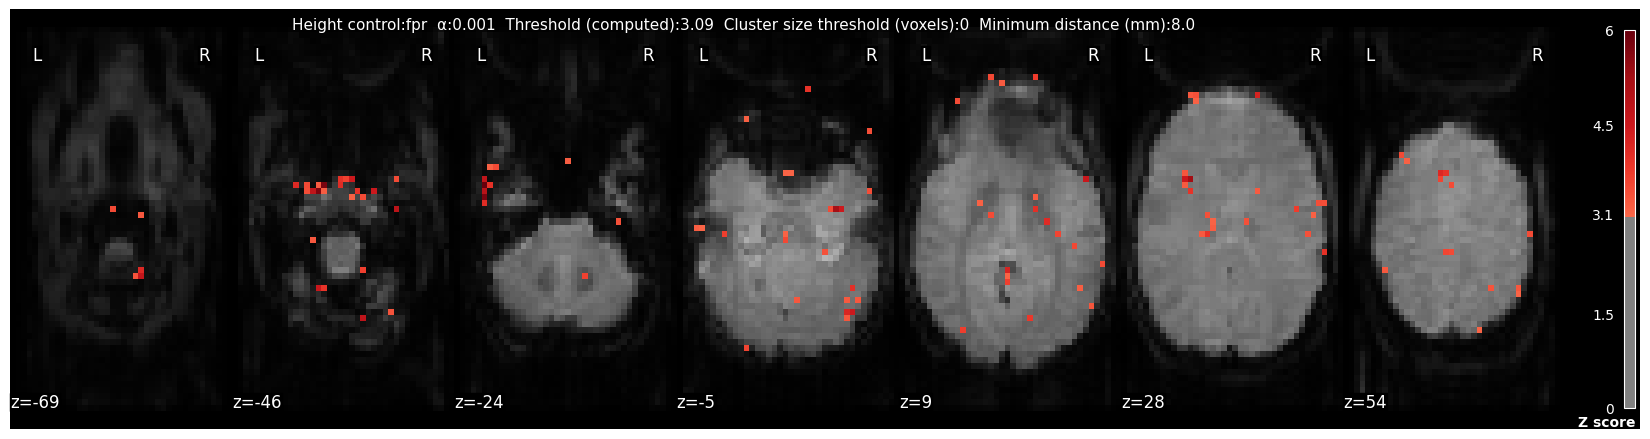

In [21]:
from nilearn.image import mean_img
from nilearn.reporting import make_glm_report
mean_img_ = mean_img(func_filename)
report = make_glm_report(glm,
                         contrasts=conditions,
                         bg_img=mean_img_,
                         )

report  # This report can be viewed in a notebook

###1.5. A decoding pipeline

This part uses Machine Learning to implement a decoder.  

In [22]:
from nilearn.decoding import Decoder
from sklearn.model_selection import LeaveOneGroupOut
decoder = Decoder(estimator='svc', mask=haxby_dataset.mask, standardize=False,
                  screening_percentile=5, cv=LeaveOneGroupOut())
decoder.fit(z_maps, conditions_label, groups=session_label)

# Return the corresponding mean prediction accuracy compared to chance

classification_accuracy = np.mean(list(decoder.cv_scores_.values()))
chance_level = 1. / len(np.unique(conditions))
print('Classification accuracy: {:.4f} / Chance level: {}'.format(
    classification_accuracy, chance_level))

Classification accuracy: 0.7589 / Chance level: 0.125


# **Exercise 1.5.1**: examine the inputs and outputs of the decoder and interpret the results
##INPUTS


*   Feature images (z‑maps) : the input are statistical brain maps and they represent the activation pattern with voxels
*  Condition labels: A vector indicating the experimental condition associated with each z‑map, and these will "teach" the model to classify
* Group labels (session numbers): A vector specifying the session from which each z‑map comes to ensure that training and testing occur on different sessions.

##OUTPUTS


*   Accuracy scores: indicates how well the model can decode each category from the brain activation patterns
*   Chance level: The accuracy expected by random guessing, computed as
1
/
number of conditions
. It serves as a baseline to evaluate whether the decoder performs above chance.






TIP.: If classification_accuracy > chance_level The model learned real patterns in fMRI data. Brain activations contain enough information to distinguish between conditions.

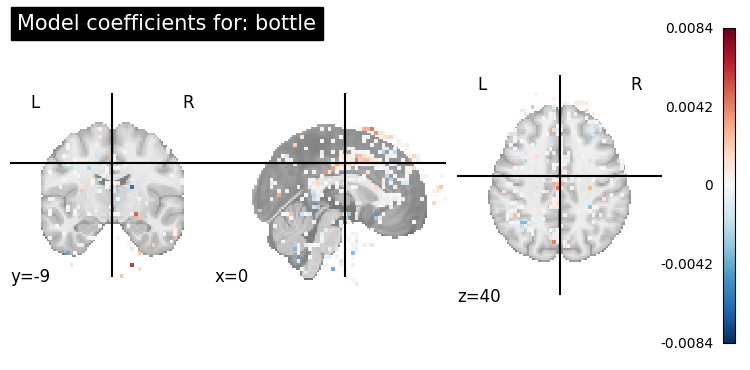

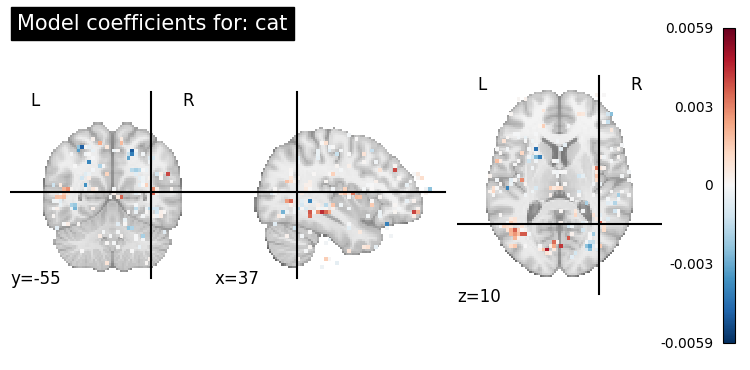

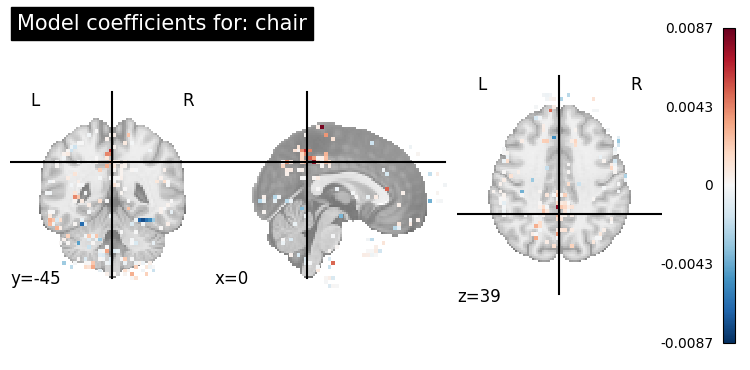

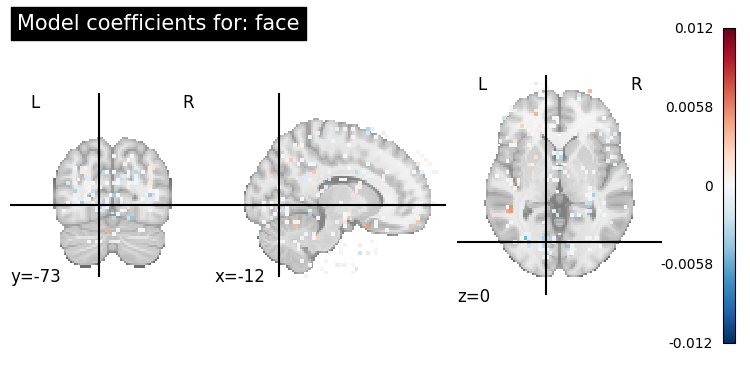

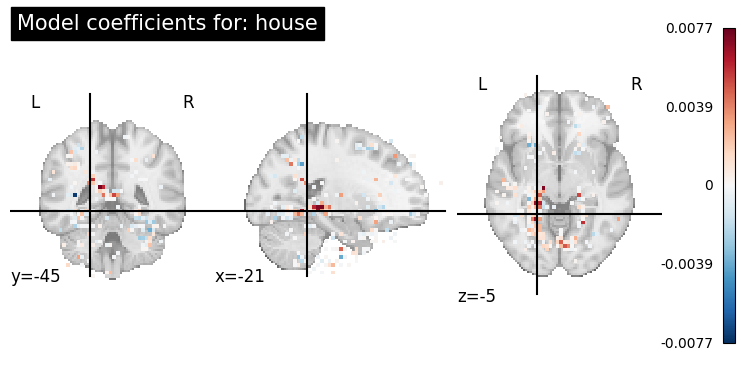

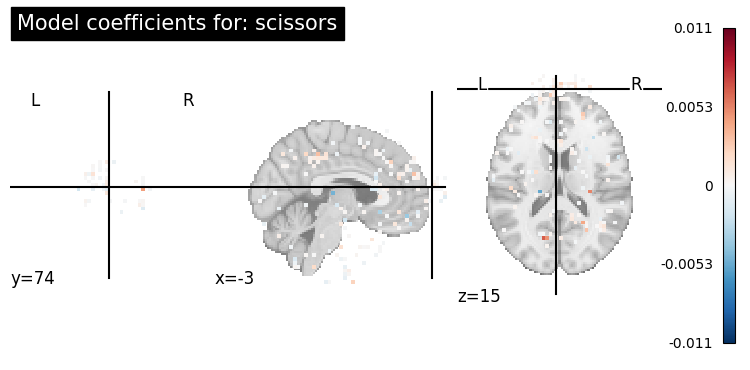

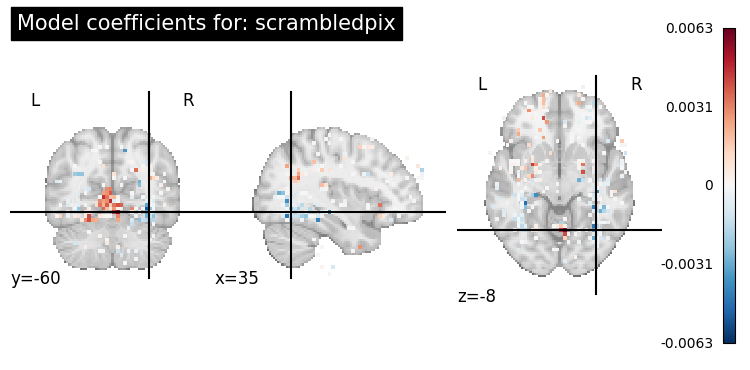

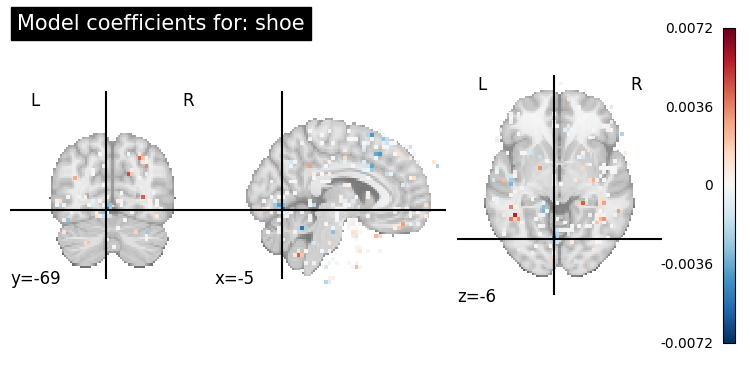

In [23]:
#A little further###############################################################
from nilearn.plotting import plot_stat_map

coef_imgs = decoder.coef_img_


for cond, coef_img in coef_imgs.items():
    plot_stat_map(coef_img, title=f"Model coefficients for: {cond}")
# Model coefficients for each image type: These colours show us what cortical region are more interesting in classifying each image because of the region activation.


In [24]:
#A little further###############################################################

#decoder.cv_scores_
for cond, vals in decoder.cv_scores_.items():
    print(cond, np.round(vals, 3))

bottle [0.429 0.143 0.714 0.857 0.857 0.571 0.571 0.714 0.571 0.714 0.286 0.429]
cat [1.    0.714 1.    0.143 0.857 0.714 0.714 0.429 0.857 1.    0.143 0.857]
chair [0.571 0.857 1.    0.571 1.    1.    0.143 1.    1.    0.714 1.    0.429]
face [1.    1.    1.    1.    0.857 0.714 1.    0.429 0.429 0.429 1.    1.   ]
house [0.857 1.    1.    1.    1.    0.429 1.    1.    0.857 1.    1.    1.   ]
scissors [0.714 0.714 0.    0.714 0.286 1.    1.    0.857 0.714 1.    0.714 1.   ]
scrambledpix [1.    1.    0.857 1.    1.    1.    1.    0.714 0.714 1.    1.    1.   ]
shoe [0.857 0.714 0.857 0.143 0.857 0.714 0.286 0.286 1.    0.143 0.429 1.   ]


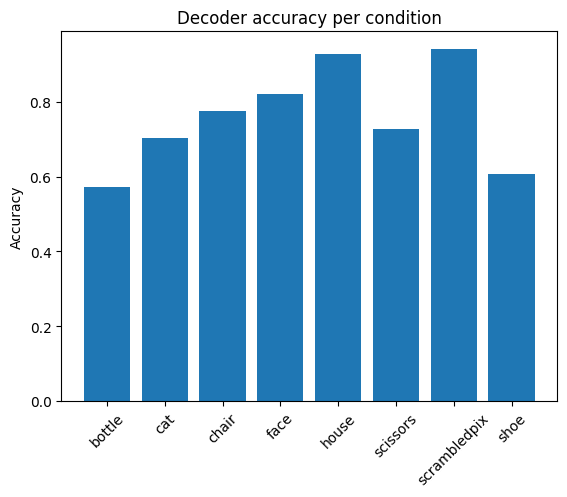

In [25]:
#A little further###############################################################

#Compare the accuracies between image type by the activation of different cortical regions, by the model we have trained


import numpy as np
import matplotlib.pyplot as plt

conds = list(decoder.cv_scores_.keys())
scores = [np.mean(v) for v in decoder.cv_scores_.values()]  # average over sessions

plt.bar(conds, scores)
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Decoder accuracy per condition")
plt.show()